<a href="https://colab.research.google.com/github/julio7173/Proyectos-Personales/blob/Modulo_2/AluraLatam_Aula_1_Inmersion_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
from google.colab import drive
drive.mount("/content/drive")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
import pandas as pd
inmuebles = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/inmuebles_bogota.csv")

Promedio de área de todos los inmuebles en los barrios en el dataset, junto a una grafica de barras del top 10.

In [53]:
columnas = {"Baños" : "Banos", "Área" : "Area"}
inmuebles = inmuebles.rename(columns = columnas)

In [54]:
inmuebles.Area.mean()

146.66470588235293

47    260
60    174
48    172
54    168
70    151
50    143
51    142
59    133
53    133
63    132
Name: Area, dtype: int64

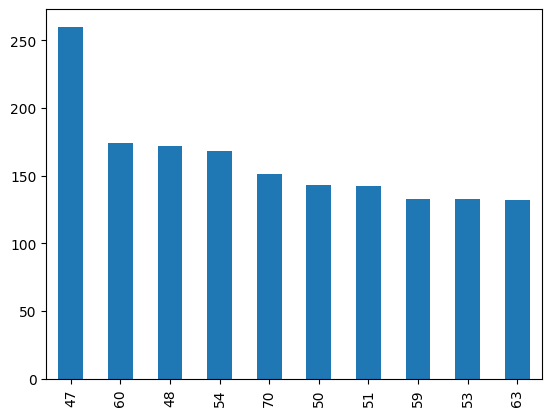

In [55]:
inmuebles.Area.value_counts().head(10).plot.bar()
inmuebles.Area.value_counts().head(10)

Consultar otros datos estadisticos, como; conteo, mediana, valores minimos y valores maximos.

En estadística, el **CONTEO** se refiere al número total de elementos en un conjunto de datos. La **MEDIANA** es el valor que se encuentra en el medio de un conjunto de datos ordenados. Es decir, la mitad de los valores es menor que o igual a la mediana y la otra mitad de los valores es mayor que o igual a la mediana1. Los valores **MINIMOS** y **MAXIMOS** son, respectivamente, el valor más pequeño y el valor más grande en un conjunto de datos.

In [56]:
inmuebles.describe()

,Habitaciones,Banos,Area
count,9520.00,9520.00,9520.00
mean,3.07,2.45,146.66
std,2.05,1.26,1731.38
min,1.00,0.00,2.00
25%,2.00,2.00,57.00
50%,3.00,2.00,80.00
75%,3.00,3.00,135.00
max,110.00,9.00,166243.00


Estudiar mejor el **histograma de valores**, seleccionar **3 tipos de inmuebles** (*Refinar el gráfico: Títulos, aumentar el tamaño de labels, colores, conclusión de la información*);



In [57]:
valor = inmuebles.Valor.str.split(expand = True)
inmuebles ["Moneda"] = valor [0]
inmuebles ["Precio"] = valor [1]

In [58]:
inmuebles ["Precio"] = inmuebles ["Precio"].str.replace(".","",regex = True)

In [59]:
inmuebles ["Precio_Millon"] = inmuebles.Precio.astype("float")/1000000

In [60]:
pd.set_option('display.precision',2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
inmuebles.describe()

,Habitaciones,Banos,Area,Precio_Millon
count,9520.00,9520.00,9520.00,9520.00
mean,3.07,2.45,146.66,602.06
std,2.05,1.26,1731.38,704.60
min,1.00,0.00,2.00,60.00
25%,2.00,2.00,57.00,250.00
50%,3.00,2.00,80.00,409.18
75%,3.00,3.00,135.00,680.00
max,110.00,9.00,166243.00,16000.00


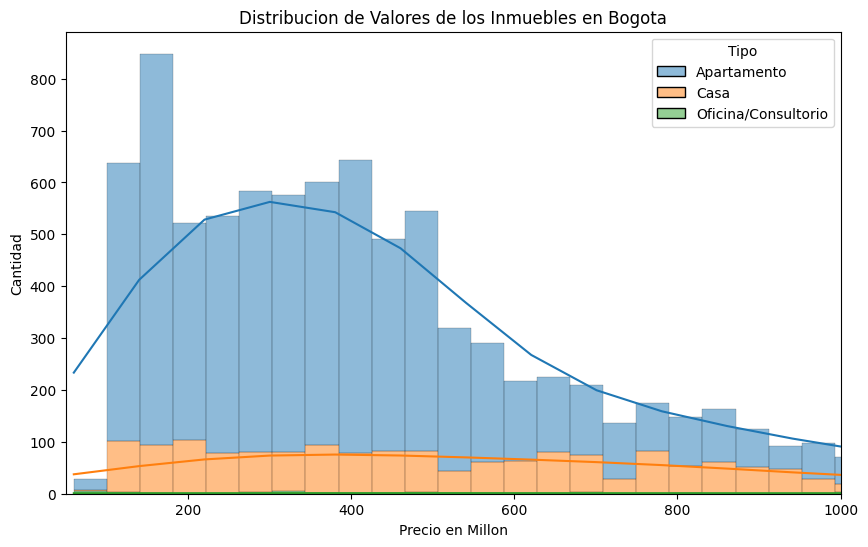

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
grafica = sns.histplot(data = inmuebles, x = "Precio_Millon", kde = True, hue_order =["Apartamento","Casa","Oficina/Consultorio"] , hue = "Tipo", multiple = "stack")
plt.title("Distribucion de Valores de los Inmuebles en Bogota")
plt.xlabel("Precio en Millon")
plt.ylabel("Cantidad")
plt.xlim((50,1000))
plt.savefig("/content/drive/MyDrive/Colab Notebooks/grafica_de_distribucion_de_frecuencias.png",format='png')
plt.show()